In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

X.shape: (26, 2)
X:
[[  9.963   4.597]
 [ 11.033  -0.168]
 [ 11.542   5.211]
 [  8.693   1.543]
 [  8.106   4.287]
 [  8.31    4.806]
 [ 11.93    4.649]
 [  9.673  -0.203]
 [  8.348   5.134]
 [  8.675   4.476]
 [  9.177   5.093]
 [ 10.24    2.455]
 [  8.689   1.487]
 [  8.922  -0.64 ]
 [  9.491   4.332]
 [  9.257   5.133]
 [  7.998   4.853]
 [  8.184   1.296]
 [  8.734   2.492]
 [  9.323   5.098]
 [ 10.064   0.991]
 [  9.5    -0.264]
 [  8.345   1.638]
 [  9.502   1.938]
 [  9.151   5.498]
 [ 11.564   1.339]]
y.shape: (26,)
y:
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


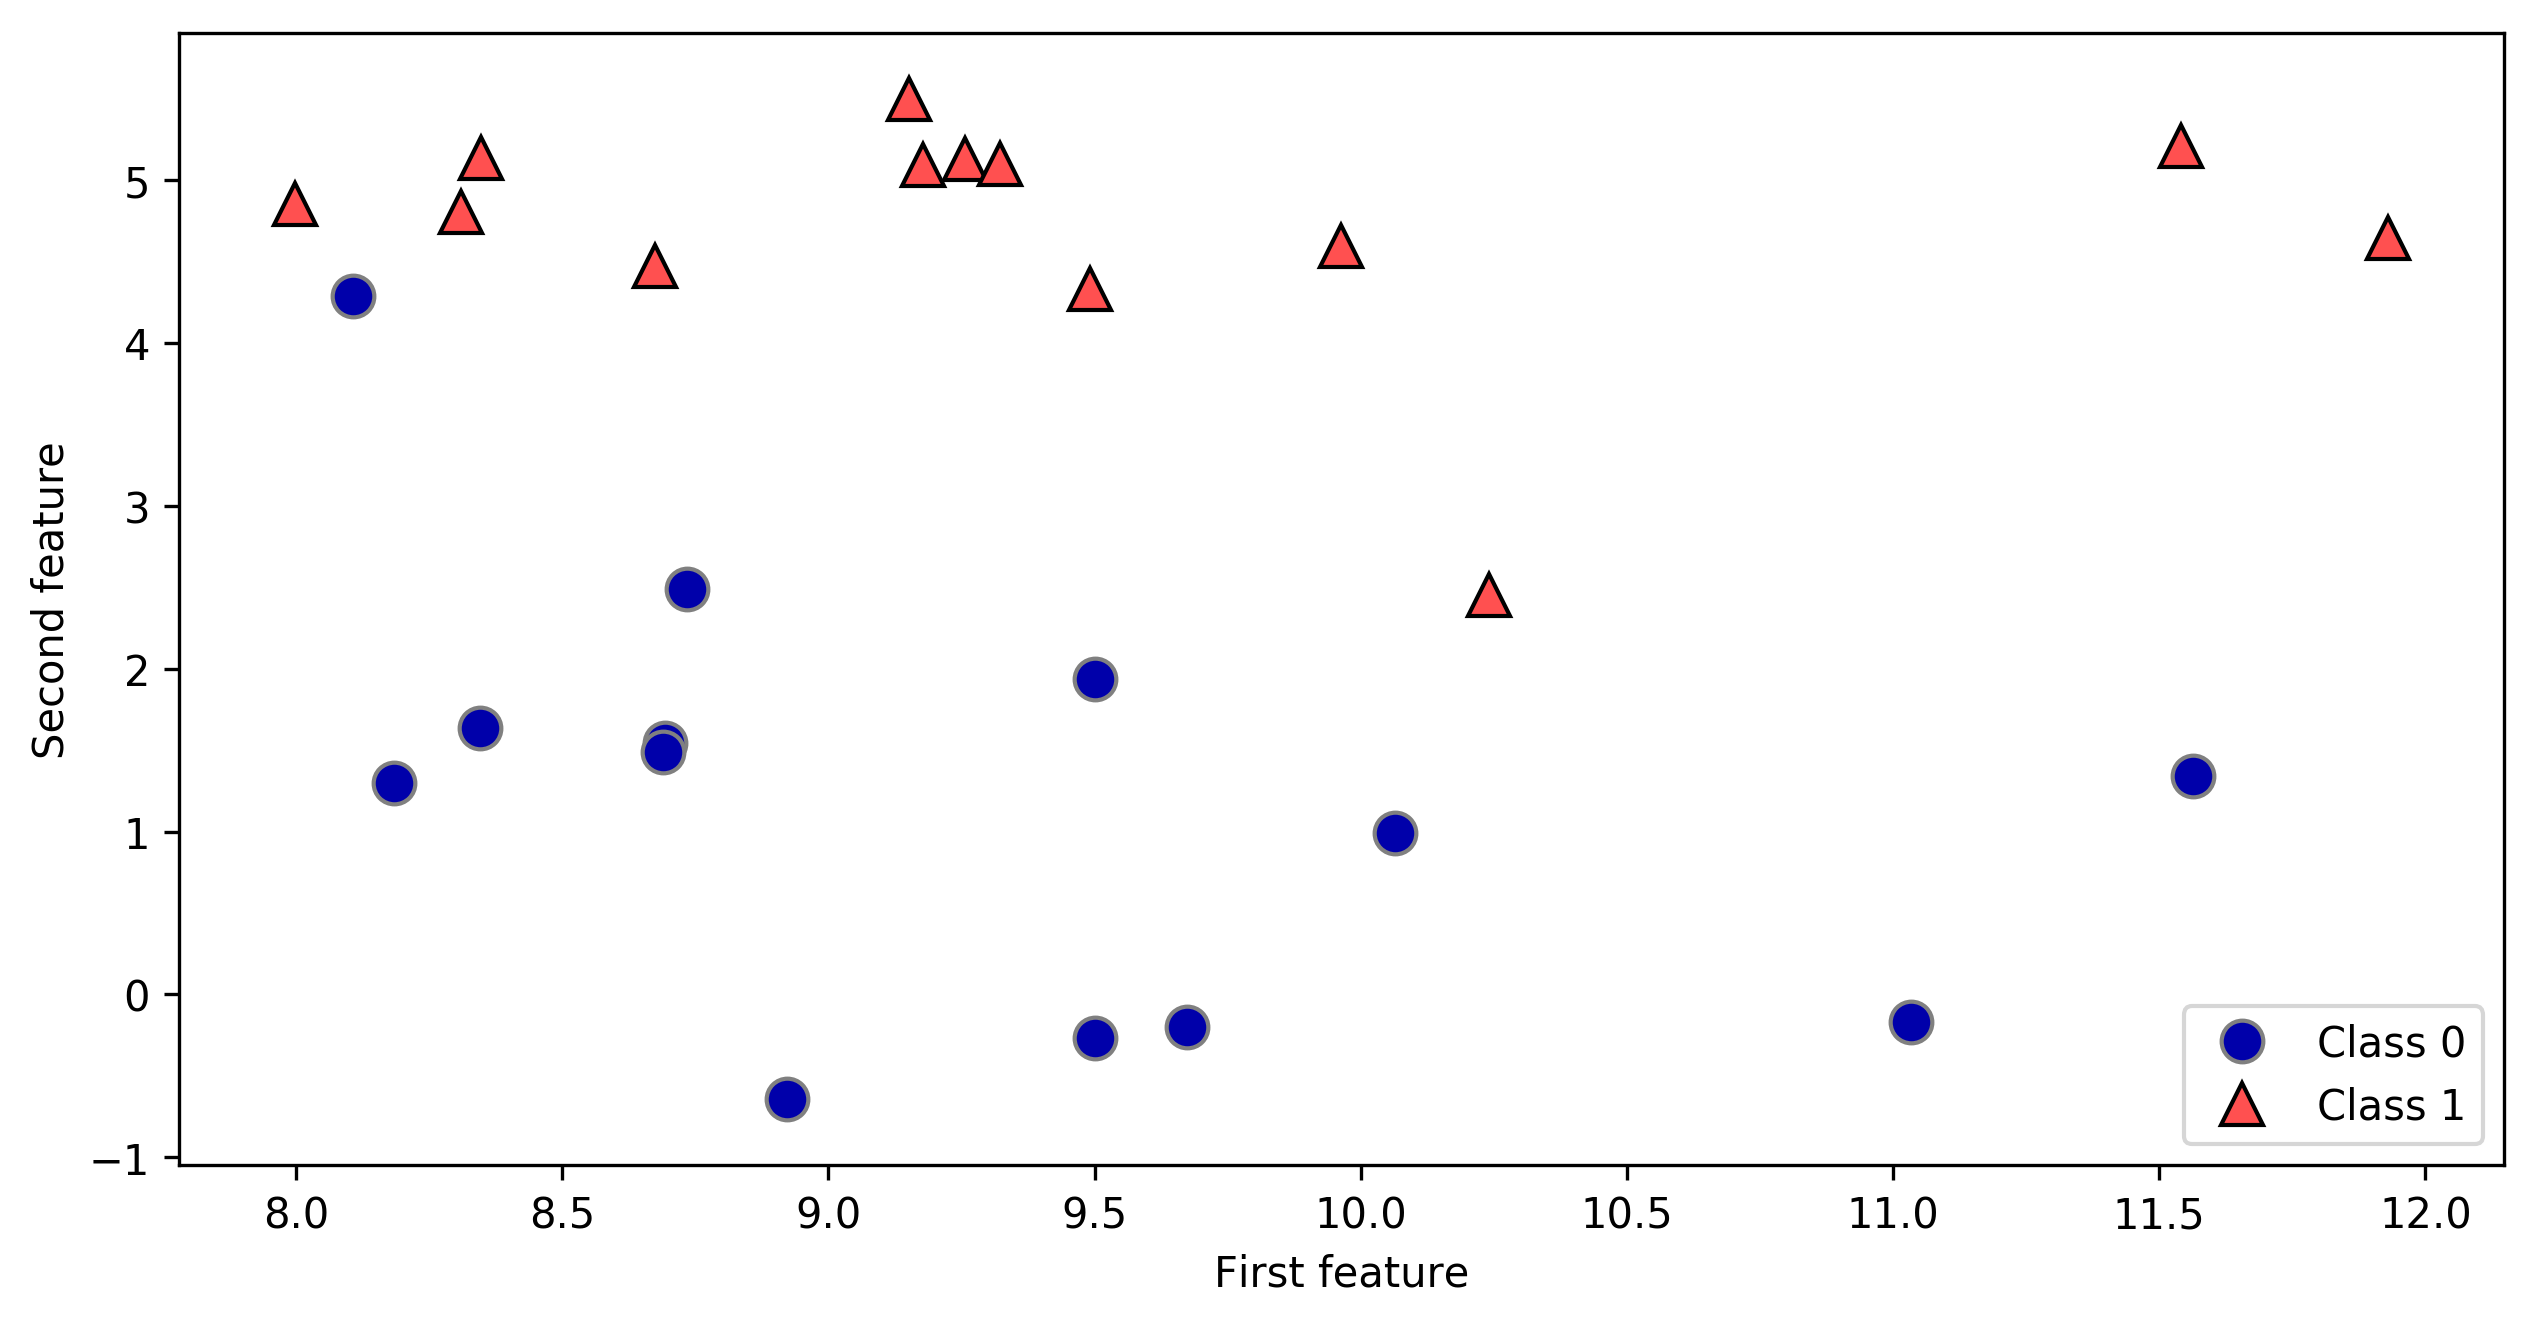

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()
print("X.shape: {}".format(X.shape))
print("X:\n{}".format(X))
print("y.shape: {}".format(y.shape))
print("y:\n{}".format(y))

# plot dataset
plt.figure(figsize=(10, 5))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [6]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print("Feature names: \n{}".format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


- Boston Housing 데이터 셋

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("boston.keys(): {}".format(boston.keys()))

boston.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [9]:
print("Feature Names: {}".format(boston.feature_names))
print("Feature Names: {}".format(boston.DESCR))

Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature Names: Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highw

In [10]:
print("Data shape: {}".format(boston.data.shape))
print("Target shape: {}".format(boston.target.shape))

Data shape: (506, 13)
Target shape: (506,)


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## 2.3.2 k-nearest Neighbor

### k-Neighbors Classification

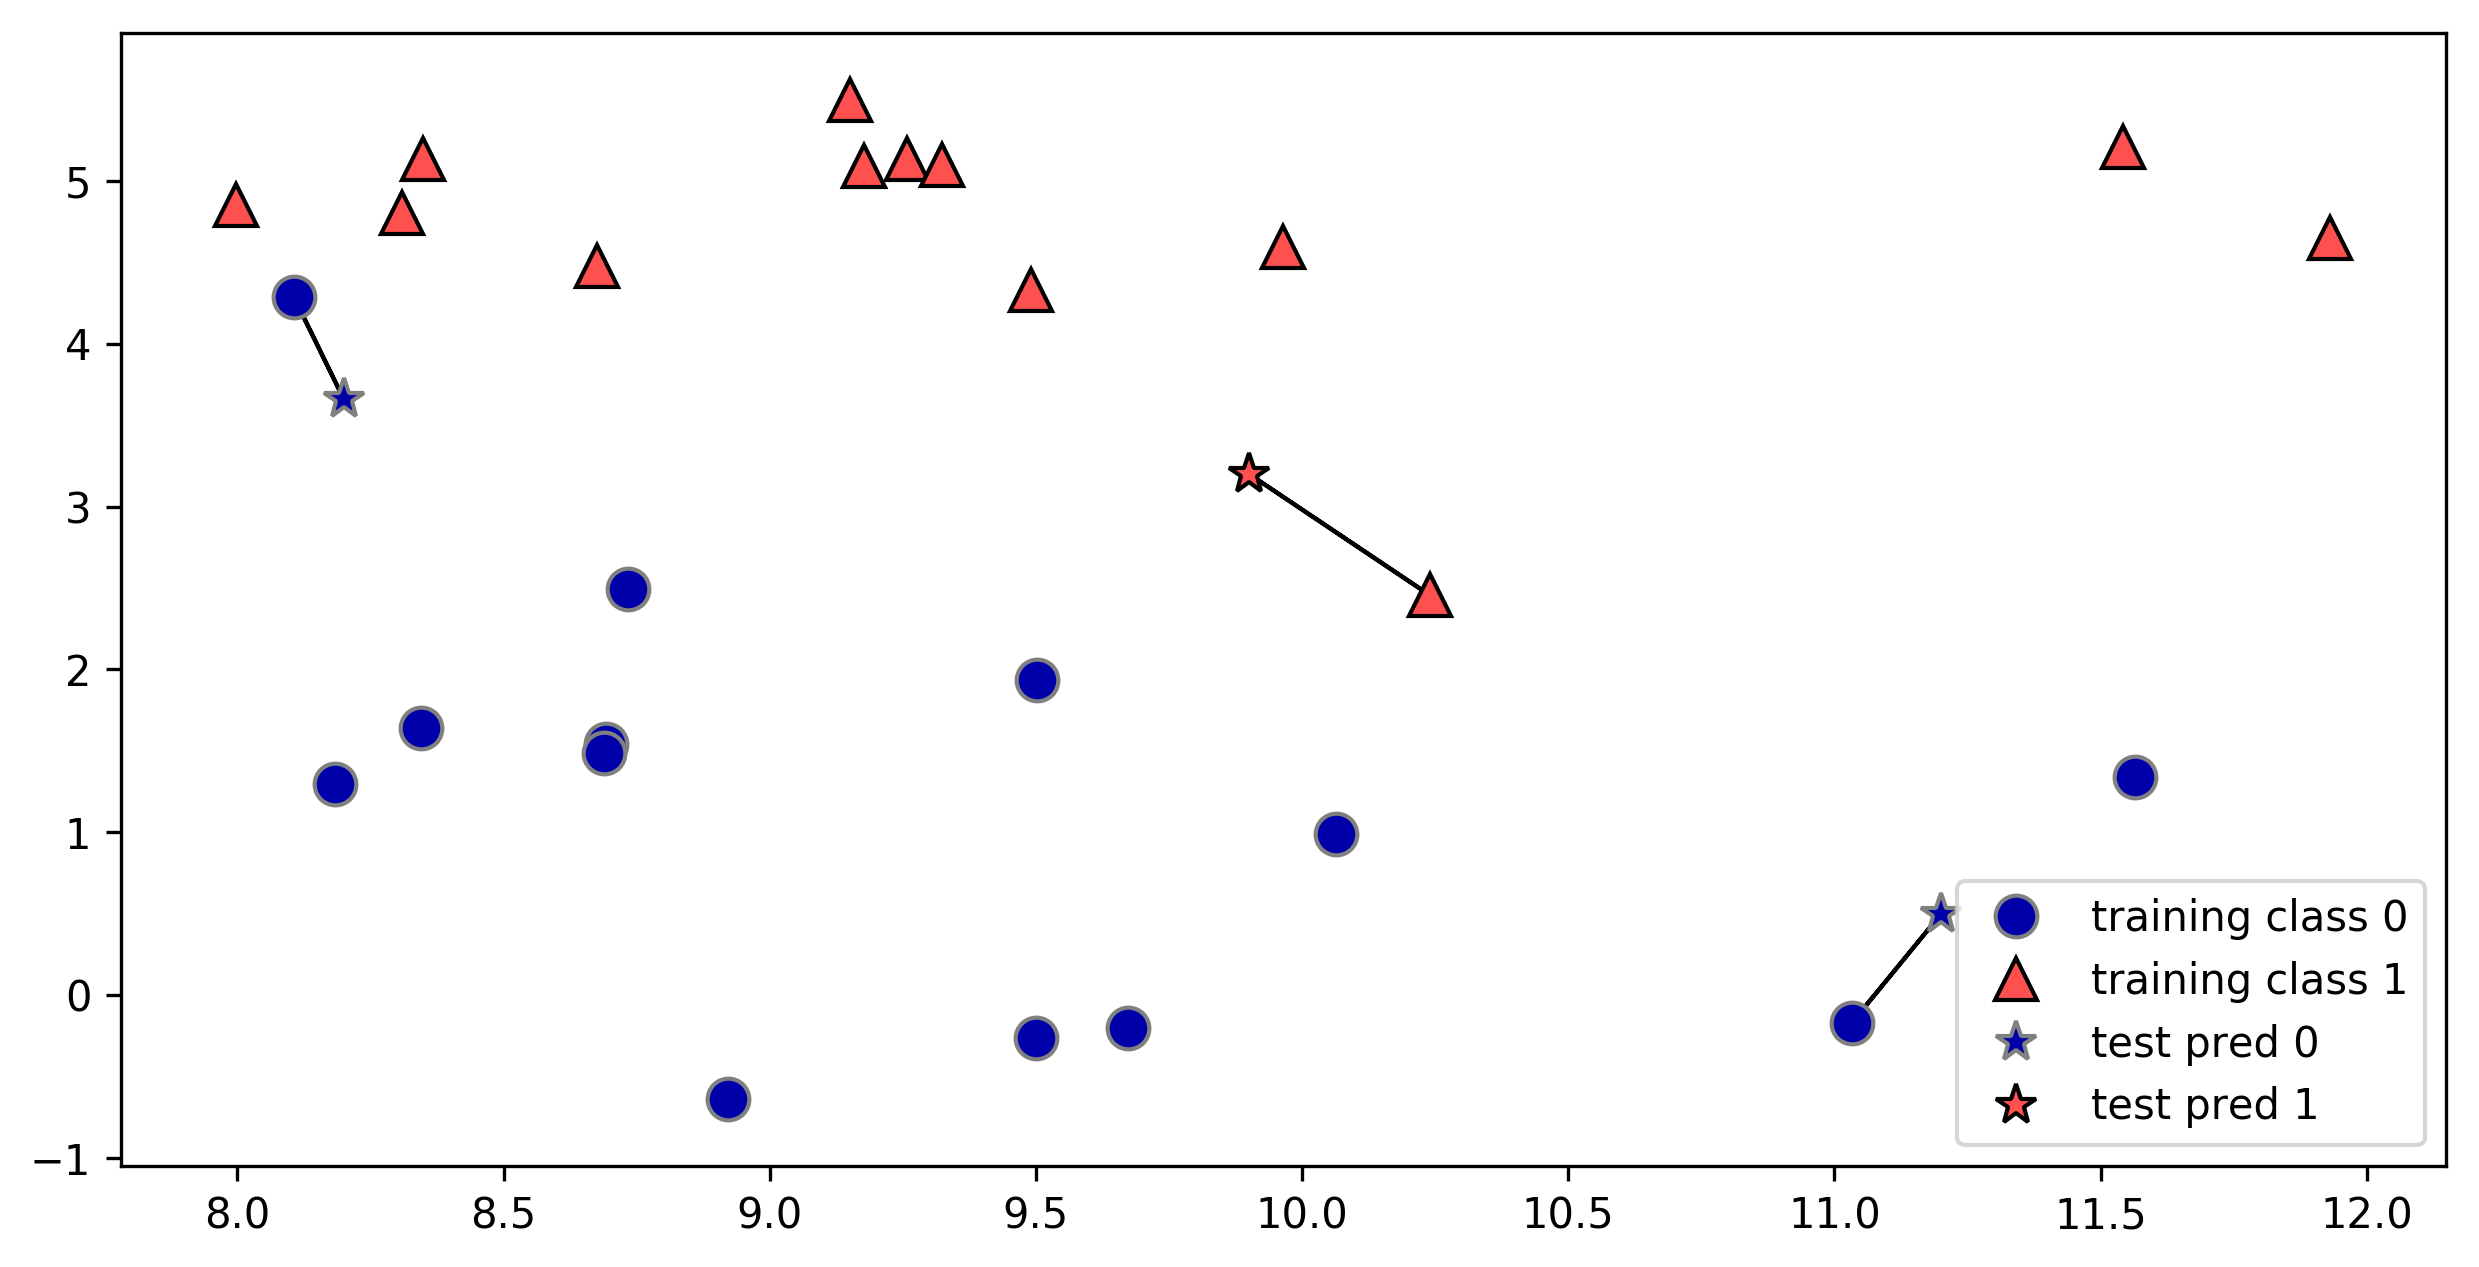

In [12]:
plt.figure(figsize=(10, 5))
mglearn.plots.plot_knn_classification(n_neighbors=1)

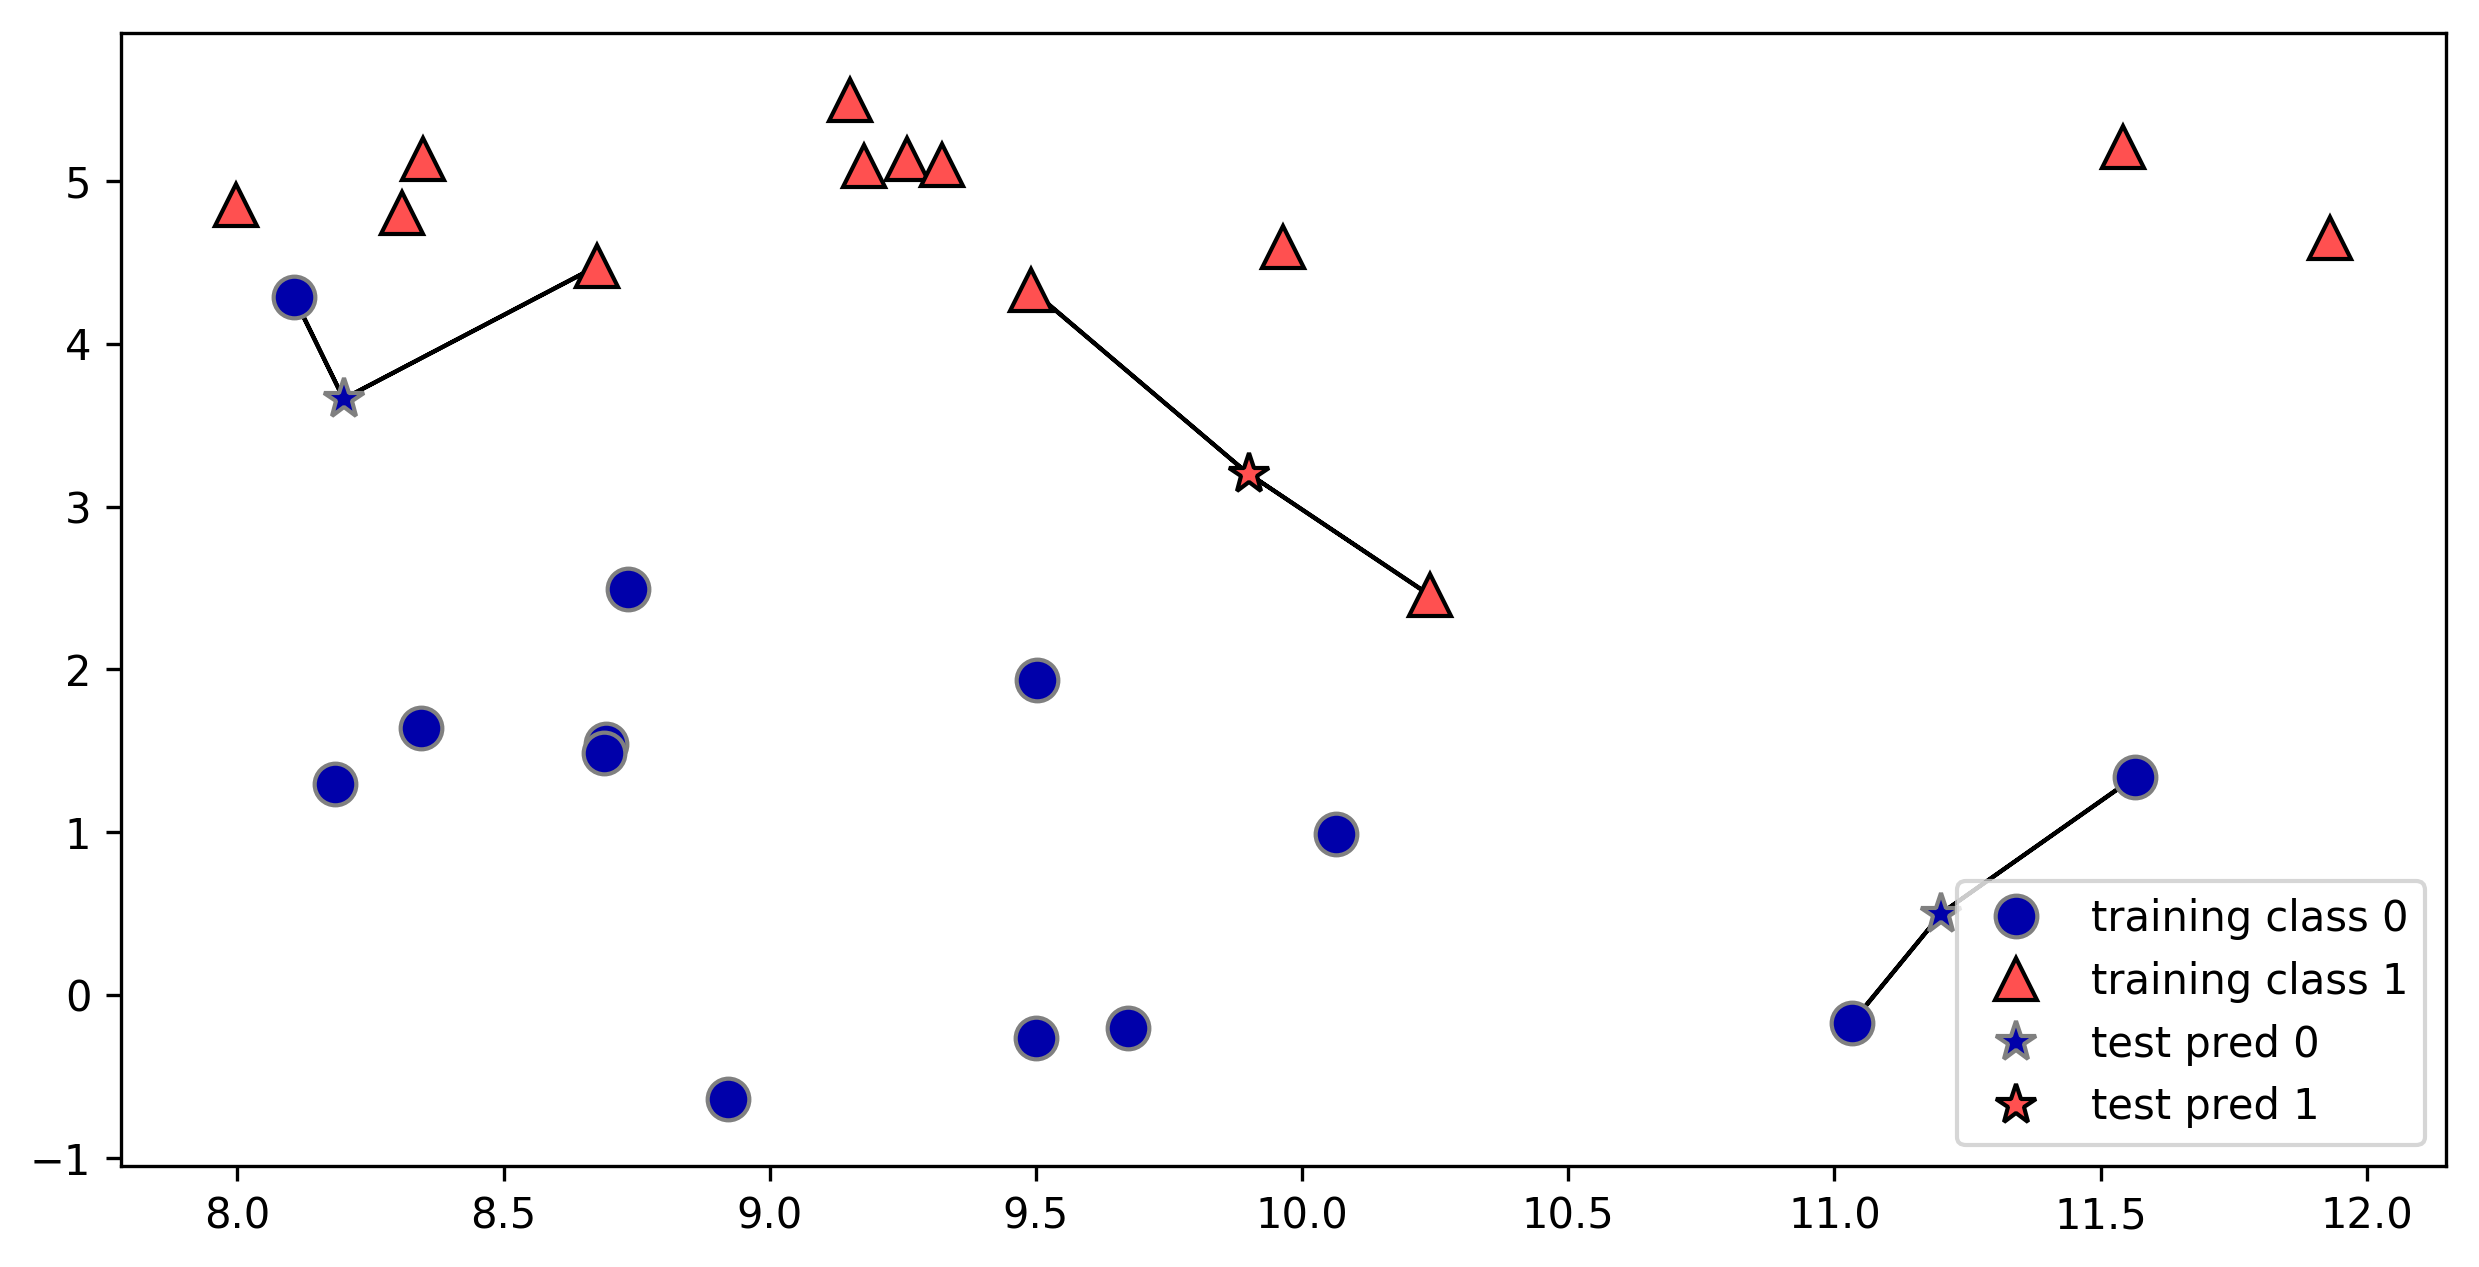

In [13]:
plt.figure(figsize=(10, 5))
mglearn.plots.plot_knn_classification(n_neighbors=2)

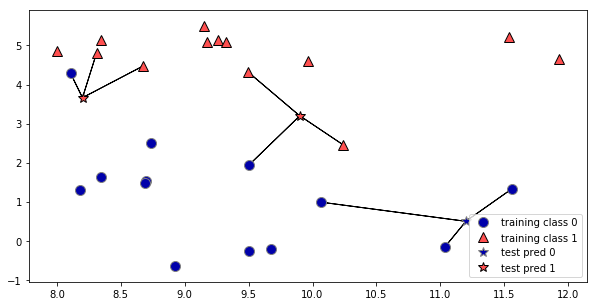

In [20]:
plt.figure(figsize=(10, 5))
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [17]:
from sklearn.model_selection import train_test_split
# X --> (26, 2)
# Y --> (26,)
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print()

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (19, 2)
y_train shape: (19,)

X_test shape: (7, 2)
y_test shape: (7,)


- train_test_split 사용
    - from sklearn.model_selection import train_test_split
- random_state : random data의 항시성

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [19]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

- fit 함수

In [24]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [25]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


- clf.score() outputs 'R²' score
  - 1.0 : Perfect Prediction
  - 0.0 : Prediction to the mean of the given y values 
  - $R^2 = 1 - {\frac{RSS}{TSS}}$
    - RSS is the residual sum of squares $∑(y - f(x))²$
    - TSS is the total sum of squares $∑(y - mean(y))²$.

### Analyzing KNeighborsClassifier

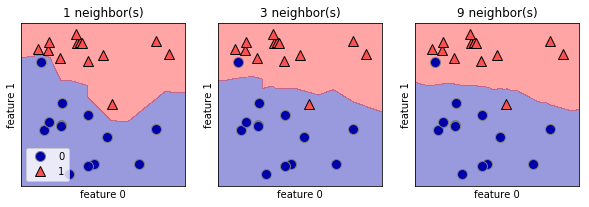

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

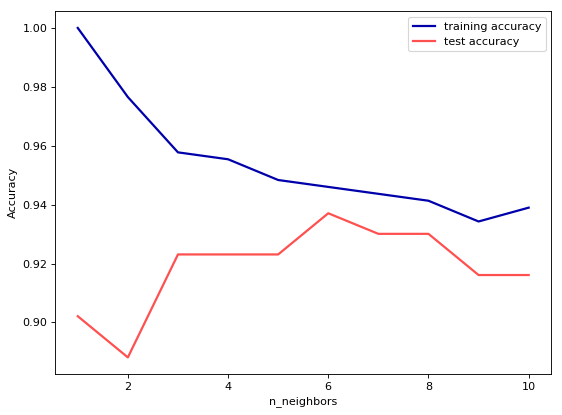

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    stratify=cancer.target, 
    random_state=66
)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### k-Neighbors Regression

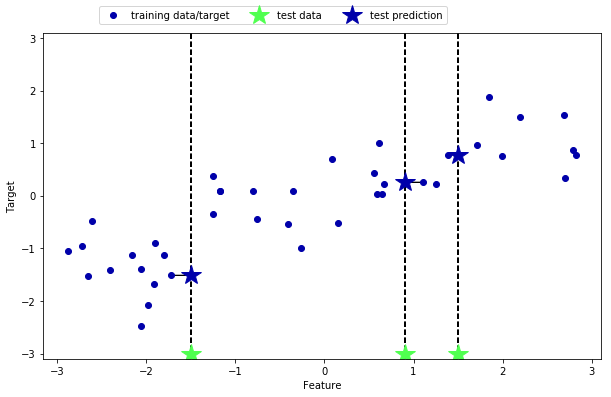

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

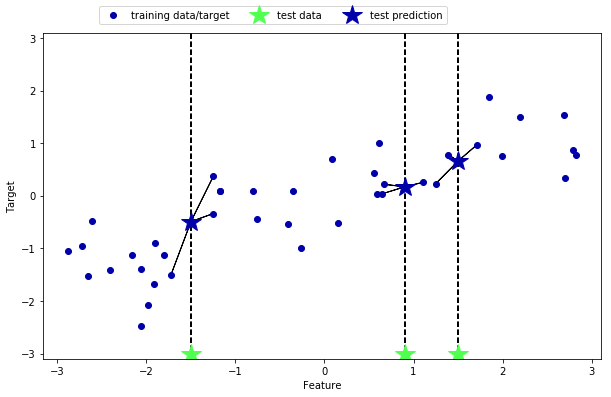

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [31]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [32]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


### Analyzing KNeighborsRegressor

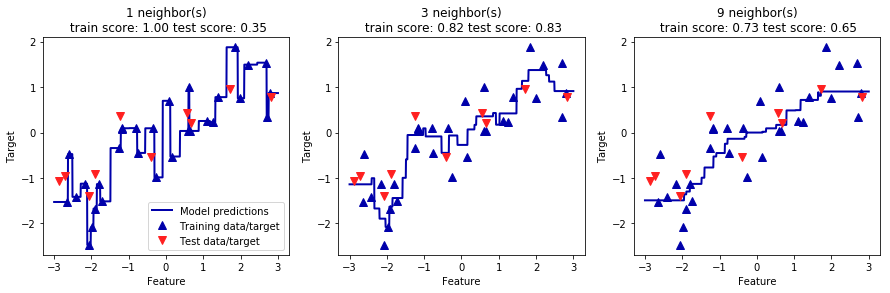

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

#### Strengths, weaknesses, and parameters

•Strengths
◾이해하기 쉽다.
◾많은 조정작업 없어도 좋은 성능을 보임.
◾더 복잡한 알고리즘을 적용해 보기 전에 시도해볼만한 알고리즘.


•Weaknesses
◾훈련데이터가 너무 많을 때 성능이 좋지 않음.
◾수백개 이상의 많은 특성을 지닌 데이터셋에 대해서는 성능이 좋지 않음.
◾희소 (특성값 대부분이 0) 데이터셋에 대해서도 성능이 좋지 않음.
◾데이터 전처리 작업이 중요 (3장 참고)

